In [36]:
%matplotlib inline
    
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import collections

In [37]:
df = pd.read_csv('../data/comp_N1103.csv', sep='|', dtype='str')
df.columns = [el.split('.')[1] for el in df.columns]

In [38]:
mask = (df.isnull().sum() / len(df)).sort_values(ascending=False) > 0.9

In [39]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[mask]

dc_specificiterome80    0.991652
dc_specificiterome79    0.989931
dc_specificiterome78    0.988200
dc_specificiterome77    0.986168
dc_specificiterome76    0.983848
dc_specificiterome75    0.981728
dc_specificiterome74    0.979574
dc_specificiterome73    0.977409
dc_specificiterome72    0.974823
dc_specificiterome71    0.972259
dc_specificiterome70    0.969117
dc_specificiterome40    0.968595
dc_specificiterome69    0.966175
dc_specificiterome68    0.963045
dc_specificiterome39    0.961446
dc_specificiterome67    0.959270
dc_specificiterome66    0.955618
dc_specificiterome38    0.955318
dc_specificiterome65    0.951522
dc_specificiterome37    0.948758
dc_specificiterome64    0.947148
dc_specificiterome63    0.942808
dc_specificiterome36    0.941353
dc_specificiterome62    0.937979
dc_specificiterome35    0.933005
dc_specificiterome61    0.932750
dc_specificiterome60    0.927233
dc_specificiterome34    0.923925
dc_specificiterome59    0.921494
dc_specificiterome33    0.915199
dc_specifi

In [129]:
df.head()

,kn_individu_national,label,dc_specificiterome1,dc_specificiterome2,dc_specificiterome3,dc_specificiterome4,dc_specificiterome5,dc_specificiterome6,dc_specificiterome7,dc_specificiterome8,...,dc_specificiterome51,dc_specificiterome52,dc_specificiterome53,dc_specificiterome54,dc_specificiterome55,dc_specificiterome56,dc_specificiterome57,dc_specificiterome58,dc_specificiterome59,dc_specificiterome60
0,1025009011,0,100340,101342,102250,102359,113954,119699,119842,119945,...,123478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1033613966,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1117619112,0,102567,102568,108128,115181,117146,117180,118732,119114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1129861981,0,118406,120130,120709,121711,121718,121784,122614,123227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1160677542,0,102536,113325,118023,118637,121500,121531,121547,121645,...,121500,124623,126130,023448,023603,102730,102734,116442,116454,118354


In [40]:
mask = df.isnull().sum(axis=1) < 60

In [41]:
df = df[mask]

In [94]:
df = df.fillna(0)

In [126]:
df_comp = pd.read_csv('../data/comp_ref.csv', sep='|', dtype='str')

In [127]:
df_comp.head()

,KC_RACINECOMPETENCE,DC_LBLRACINECOMPETENCE,KC_NOEUDCOMPETENCE,DC_LBLNOEUDCOMPETENCE,KC_COMPETENCESROME,DC_LBLCOMPETENCESROME
0,00055,Transport,00234,Personnel navigant,110161,Techniques de gestion de conflit et de panique...
1,00055,Transport,00234,Personnel navigant,110227,Vérifier les cartes d'embarquement avec la lis...
2,00055,Transport,00234,Personnel navigant,110229,Géographie liée aux services aéroportuaires (f...
3,00055,Transport,00234,Personnel navigant,113911,Renseigner les documents de bord
4,00055,Transport,00234,Personnel navigant,119044,Logiciels aéronautiques


In [128]:
df1 = df_comp[['KC_COMPETENCESROME', 'KC_NOEUDCOMPETENCE']]

In [43]:
ref_comp = dict(df1.values)

In [46]:
comp_list = df.drop(['kn_individu_national', 'label'], axis=1).values.flatten()
comp_list = list(set(comp_list))

In [49]:
for comp in comp_list:
    try:
        df = df.replace(comp, ref_comp[comp])
    except:
        df = df.replace(comp, '0')

In [50]:
df.head()

,kn_individu_national,label,dc_specificiterome1,dc_specificiterome2,dc_specificiterome3,dc_specificiterome4,dc_specificiterome5,dc_specificiterome6,dc_specificiterome7,dc_specificiterome8,...,dc_specificiterome71,dc_specificiterome72,dc_specificiterome73,dc_specificiterome74,dc_specificiterome75,dc_specificiterome76,dc_specificiterome77,dc_specificiterome78,dc_specificiterome79,dc_specificiterome80
0,1025009011,0,0,0,0,0,00017,00134,00170,00366,...,0,0,0,0,0,0,0,0,0,0
3,1117619112,0,0,0,00010,00067,00222,00203,00277,00021,...,0,0,0,0,0,0,0,0,0,0
5,1160677542,0,0,00222,00222,00366,00007,00043,00314,00007,...,0,0,0,0,0,0,0,0,0,0
6,1179552296,0,00171,00171,00127,00298,00147,00321,00147,00171,...,0,0,0,0,0,0,0,0,0,0
7,1180951043,0,0,0,00022,00022,00123,00022,00022,00130,...,00358,00076,00106,00284,00059,00004,0,0,0,0


In [51]:
def compute_comp_percent(df, label):
    df1 = df[df['label'] == label].drop(['kn_individu_national', 'label'], axis=1)
    df1 = df1.values
    comp_list = []
    for i in range(len(df1)):
        comp_list = comp_list + list(set(df1[i]))
        
    comp_list_num = collections.Counter(comp_list)
    num_ind = len(df1)
    for k, v in comp_list_num.items():
        comp_list_num[k] = v / num_ind
    df1_comp = pd.DataFrame(index=comp_list_num.keys(), data=comp_list_num.values())
    df1_comp.columns = ['percent']
    df1_comp = df1_comp.sort_values(by='percent', ascending=False).iloc[1:]
    df1_comp = df1_comp[df1_comp.percent > 0.02]
    return df1_comp

In [52]:
df1 = compute_comp_percent(df, '1')
df0 = compute_comp_percent(df, '0')

In [54]:
df0

,percent
00222,0.402333
00170,0.396078
00358,0.351040
00365,0.326154
00134,0.319730
...,...
00191,0.020287
00196,0.020254
00100,0.020220
00251,0.020118


In [55]:
df1.shape, df0.shape

((97, 1), (134, 1))

In [56]:
df_comp_all = df1.join(df0, lsuffix='_1', rsuffix='_0')

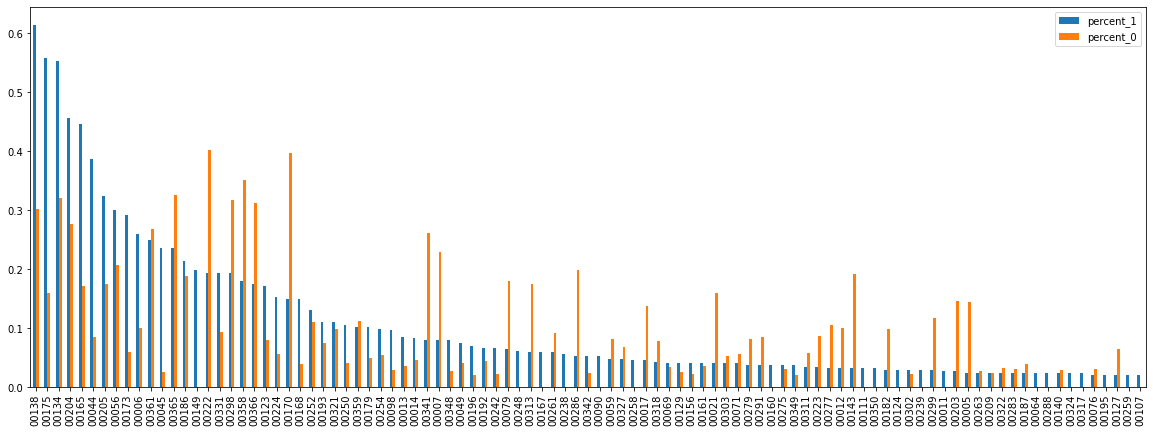

In [57]:
df_comp_all.plot(kind='bar', figsize=(20, 7))

In [58]:
df_comp_all['diff_1_0'] = df_comp_all.percent_1 - df_comp_all.percent_0

In [81]:
diff_comp_index = df_comp_all.diff_1_0.abs().sort_values(ascending=False).iloc[:15].index.tolist()

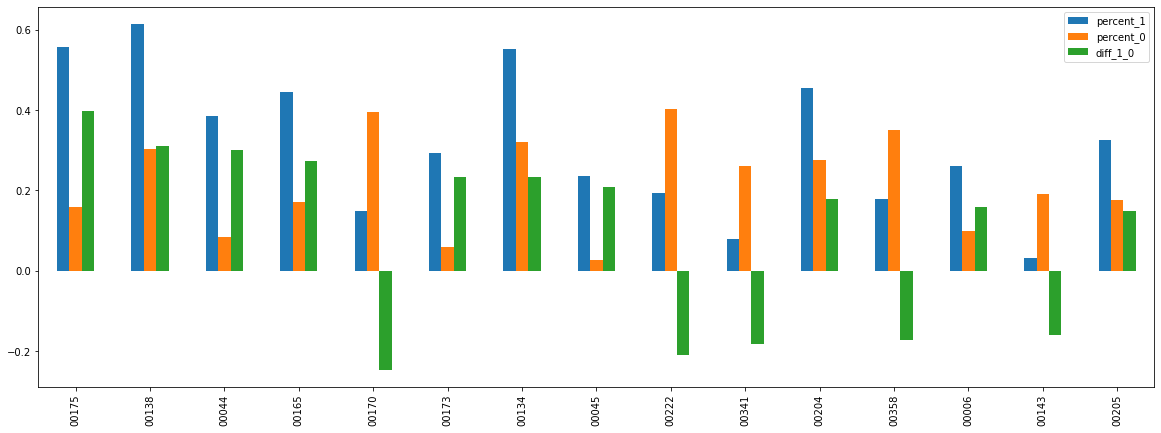

In [82]:
df_comp_all.loc[diff_comp_index].plot(kind='bar', figsize=(20, 7))

In [83]:
diff_comp_index

['00175',
 '00138',
 '00044',
 '00165',
 '00170',
 '00173',
 '00134',
 '00045',
 '00222',
 '00341',
 '00204',
 '00358',
 '00006',
 '00143',
 '00205']

In [129]:
ref_comp2 = df_comp[['KC_NOEUDCOMPETENCE', 'DC_LBLNOEUDCOMPETENCE']]

In [130]:
ref_comp2 = ref_comp2.drop_duplicates()

In [133]:
df_comp.to_csv('../data/comp_ref.csv', sep='|', index=False)

In [132]:
ref_comp2.to_csv('../data/comp_noeud_ref.csv', sep='|', index=False)

In [134]:
df_comp[df_comp['KC_NOEUDCOMPETENCE'] == '00143']

,KC_RACINECOMPETENCE,DC_LBLRACINECOMPETENCE,KC_NOEUDCOMPETENCE,DC_LBLNOEUDCOMPETENCE,KC_COMPETENCESROME,DC_LBLCOMPETENCESROME
5929,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,117209,Améliorer le système d'information comptable
5930,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,124775,Superviser une gestion administrative
5931,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,119401,Étudier la rentabilité d'une structure
5932,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,124771,Suivre des positions de trésorerie
5933,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,119467,Concevoir des procédures de gestion
...,...,...,...,...,...,...
5996,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,117228,Superviser la gestion comptable
5997,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,123530,Organiser un inventaire comptable
5998,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,119477,Gestion budgétaire de production
5999,00008,Comptabilité - contrôle de gestion - audit,00143,Gestion et contrôles comptables,116964,Cadre réglementaire et légal de la consolidati...


In [88]:
comp_array = df.drop(['kn_individu_national', 'label'], axis=1).values

In [89]:
comp_array = [list(set(el)) for el in comp_array]

In [91]:
for i in range(len(comp_array)):
    comp_array[i] = list(set(comp_array[i]).intersection(set(diff_comp_index)))

In [93]:
df['comp_list'] = comp_array 

In [96]:
df = df[['kn_individu_national', 'label', 'comp_list']]

In [98]:
for el in diff_comp_index:
    df[el] = df.comp_list.apply(lambda x: 1 if el in x else 0)

C:\Users\imco8670\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
df = df.drop(['label', 'comp_list'], axis=1)

In [103]:
features = pd.read_csv('../model/data/train_dataset_N1103.csv', sep='|', dtype='str')

In [106]:
len(features), len(df)

(2116, 29948)

In [107]:
features = features.set_index('kn_individu_national').join(df.set_index('kn_individu_national'))

In [110]:
df

,kn_individu_national,00175,00138,00044,00165,00170,00173,00134,00045,00222,00341,00204,00358,00006,00143,00205
0,1025009011,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,1117619112,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
5,1160677542,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
6,1179552296,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,1180951043,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90049,8093071349,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
90051,8101003984,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
90052,8105474216,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
90053,8106064076,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [109]:
features.isnull().sum() / len(features)

dep               0.000000
had_pcs           0.000000
had_same_pcs      0.000000
had_pcs_proche    0.000000
pcs_counter       0.000000
                    ...   
00204             0.640359
00358             0.640359
00006             0.640359
00143             0.640359
00205             0.640359
Length: 103, dtype: float64